In [18]:
#Embedding Layer Initialization in Keras
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

In [19]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from google.colab import files
import re, os
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

Model 1

In [3]:
max_features = 10000
maxlen = 150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 [==============================] - 1s 0us/step


In [33]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history_1 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 23s 37ms/step - loss: 0.5947 - acc: 0.6985 - val_loss: 0.4242 - val_acc: 0.8294
Epoch 2/10
625/625 [==============================] - 6s 10ms/step - loss: 0.3307 - acc: 0.8683 - val_loss: 0.3188 - val_acc: 0.8666
Epoch 3/10
62

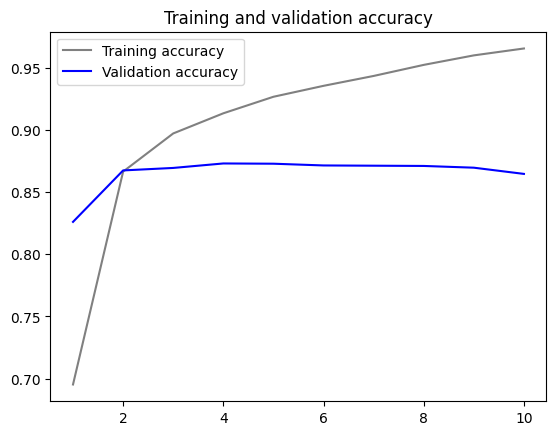

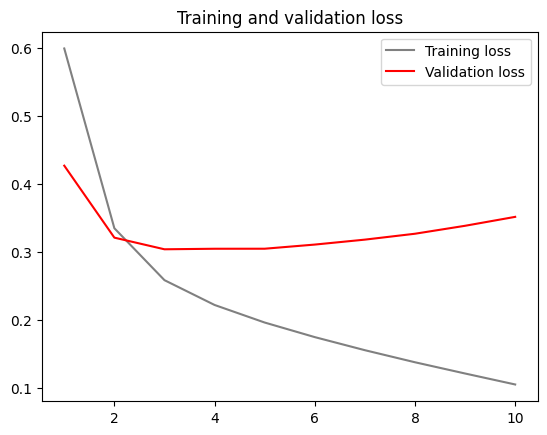

In [ ]:
#Visualizing of training and validation metrics
import matplotlib.pyplot as plt

accuracy = history_1.history['acc']
val_accuracy = history_1.history['val_acc']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#TEst metrics
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 2ms/step - loss: 0.3485 - acc: 0.8665
Test loss: 0.34848058223724365
Test accuracy: 0.8665199875831604


In [ ]:
#Model 2 - Training 100 samples

In [ ]:
max_features=10000
maxlen=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:100]
y_train = y_train[:100]

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history_2 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_4 (Flatten)         (None, 1200)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 1s 174ms/step - loss: 0.6927 - acc: 0.4750 - val_loss: 0.6916 - val_acc: 0.5000
Epoch 2/10
3/3 [==============================] - 0s 83ms/step - loss: 0.6680 - acc: 0.8875 - val_loss: 0.6920 - val_acc: 0.6000
Epoch 3/10
3/3 [=====

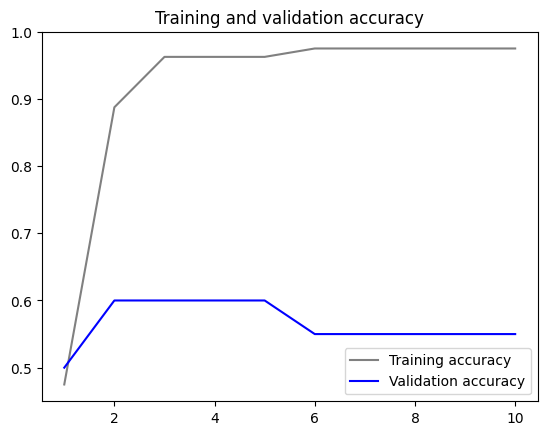

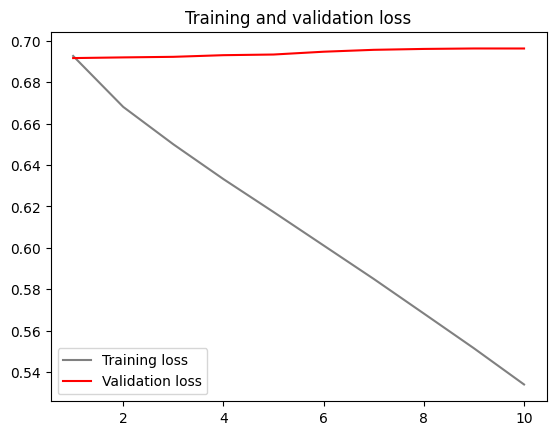

In [ ]:
##Visualizing of training and validation metrics
accuracy = history_2.history['acc']
val_accuracy = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#Test results
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 2ms/step - loss: 0.6955 - acc: 0.4998
Test loss: 0.6955023407936096
Test accuracy: 0.49983999133110046


Using Pre-Trained word embeddings

Model 3(Pre-Trained model) - Training- 100 samples

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [10]:
import os

In [11]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  3976k      0  0:00:20  0:00:20 --:--:-- 4142k


In [12]:
imdb_dir = '/content/drive/MyDrive/aclImdb'

In [13]:
train_dir = os.path.join(imdb_dir, 'train')

In [14]:
labels = []
texts = []

In [15]:
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [ ]:
#Data Preprocessing
#Cutoff reviews after 150 words
#Restricting training samples to 100
#Validating on 10,000 samples
#Considering only the top 10,000 words
maxlen = 150
training_samples = 100
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [24]:
#Loading GloVe word embeddings
glove_dir = '/content/glove.6B'
import re, os
embeddings_index = {}
f = open(os.path.join('glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [25]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [ ]:
#Building model
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1017057 (3.88 MB)
Trainable params: 1017057 (3.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Integrating GloVe word embeddings into the model
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
print("Training data shape:", y_train.shape)

Training data shape: (100,)


In [ ]:
#Neural network training with GloVe embeddings
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history_3 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.3a')

Epoch 1/10
4/4 [==============================] - 16s 4s/step - loss: 0.7140 - acc: 0.5300 - val_loss: 0.7509 - val_acc: 0.5015
Epoch 2/10
4/4 [==============================] - 7s 2s/step - loss: 0.6529 - acc: 0.6400 - val_loss: 0.7562 - val_acc: 0.5015
Epoch 3/10
4/4 [==============================] - 10s 3s/step - loss: 0.6468 - acc: 0.6400 - val_loss: 0.7585 - val_acc: 0.5013
Epoch 4/10
4/4 [==============================] - 11s 3s/step - loss: 0.6388 - acc: 0.6400 - val_loss: 0.7514 - val_acc: 0.5012
Epoch 5/10
4/4 [==============================] - 5s 2s/step - loss: 0.6251 - acc: 0.6400 - val_loss: 0.7159 - val_acc: 0.5059
Epoch 6/10
4/4 [==============================] - 7s 2s/step - loss: 0.6169 - acc: 0.6500 - val_loss: 0.7056 - val_acc: 0.5134
Epoch 7/10
4/4 [==============================] - 6s 2s/step - loss: 0.6100 - acc: 0.7100 - val_loss: 0.7324 - val_acc: 0.5019
Epoch 8/10
4/4 [==============================] - 10s 3s/step - loss: 0.6007 - acc: 0.6700 - val_loss: 0.777

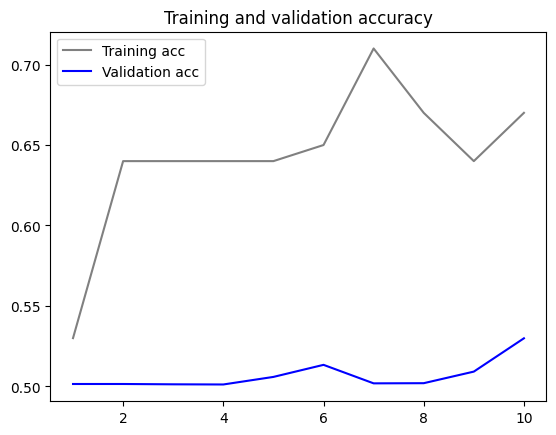

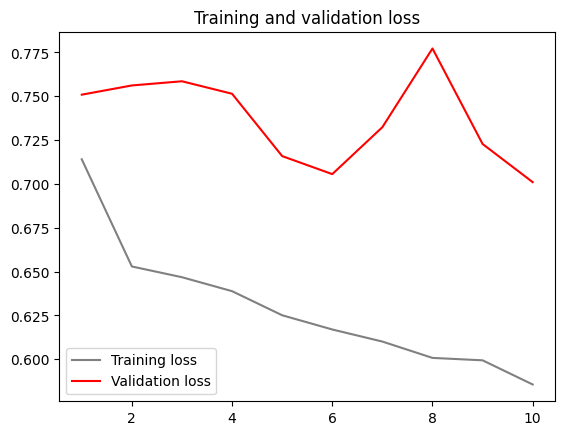

In [ ]:
##Visualizing of training and validation metrics
import matplotlib.pyplot as plt

acc = history_3.history['acc']
val_acc = history_3.history['val_acc']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'grey', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [ ]:
model.load_weights('pre_trained_glove_model.3a')
model.evaluate(x_test, y_test)

782/782 [==============================] - 18s 23ms/step - loss: 0.7016 - acc: 0.5262


[0.7015801668167114, 0.5261600017547607]

In [ ]:
#Model 4 - Training sample size of 1000 using embedding layer
max_features=10000
maxlen=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:1000]
y_train = y_train[:1000]

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history_4 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 2s 19ms/step - loss: 0.6918 - acc: 0.5312 - val_loss: 0.6917 - val_acc: 0.5050
Epoch 2/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6741 - acc: 0.7962 - val_loss: 0.6905 - val_acc: 0.4850
Epoch 3/10
25/25 [=

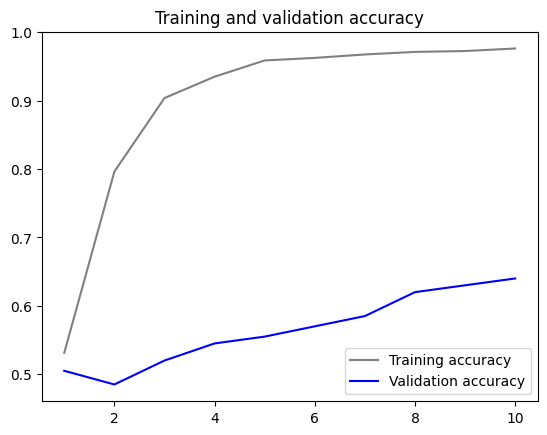

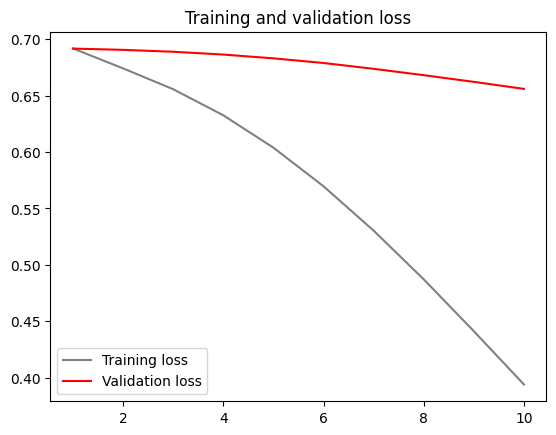

In [ ]:
accuracy = history_4.history['acc']
val_accuracy = history_4.history['val_acc']
loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 3ms/step - loss: 0.6684 - acc: 0.5983
Test loss: 0.6684169769287109
Test accuracy: 0.5983200073242188


In [ ]:
#Model 5 - Taining sample of 5000 using embedding layer and Conv1D
max_features=10000
maxlen=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:5000]
y_train = y_train[:5000]

In [ ]:
model = Sequential()
model.add(Embedding(10000, 10, input_length=maxlen))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history_5 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 10)           100000    
                                                                 
 conv1d (Conv1D)             (None, 148, 512)          15872     
                                                                 
 max_pooling1d (MaxPooling1  (None, 49, 512)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 256)           393472    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 15, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 13, 256)          

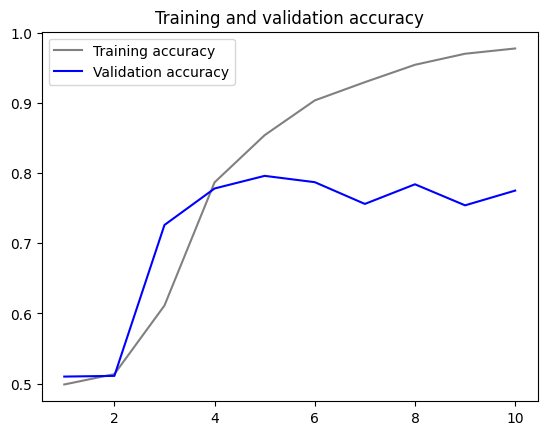

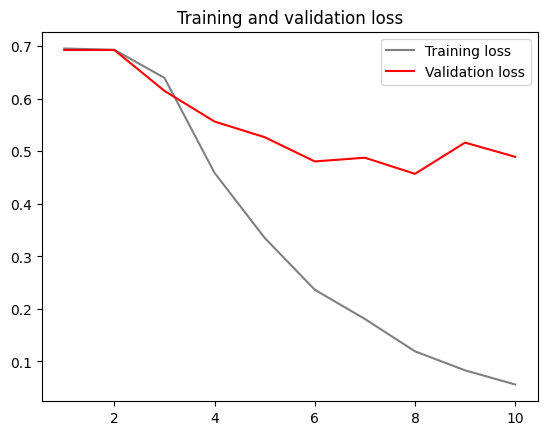

In [ ]:
#Visualizing of training and validation metrics
accuracy = history_5.history['acc']
val_accuracy = history_5.history['val_acc']
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 34s 43ms/step - loss: 0.4992 - acc: 0.7722
Test loss: 0.49919718503952026
Test accuracy: 0.7721999883651733


In [7]:
#Model 6 - Training sample size of 10000 using both embedding layers and Conv1D
max_features=10000
maxlen=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:10000]
y_train = y_train[:10000]


In [ ]:
model = Sequential()
model.add(Embedding(10000, 12, input_length=maxlen))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history_6 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 12)           120000    
                                                                 
 conv1d_3 (Conv1D)           (None, 148, 512)          18944     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 49, 512)           0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 47, 256)           393472    
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 15, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 13, 256)          

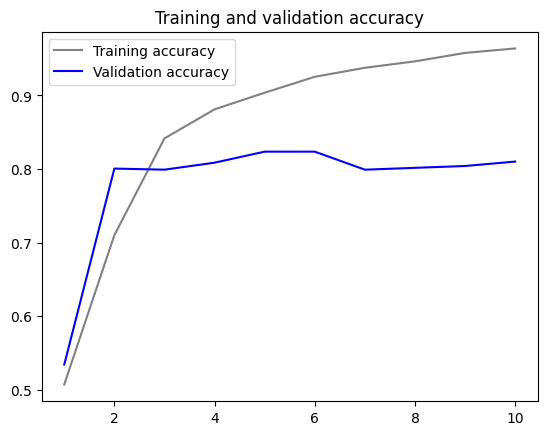

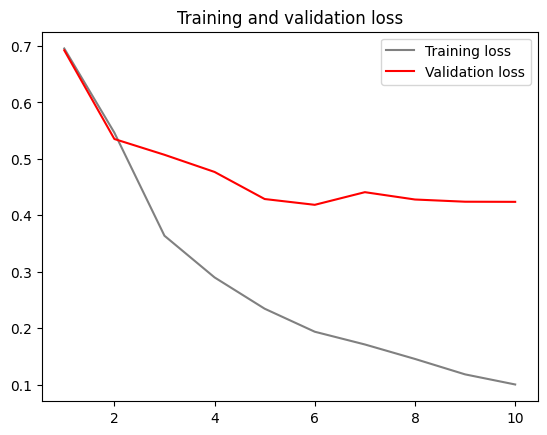

In [ ]:
accuracy = history_6.history['acc']
val_accuracy = history_6.history['val_acc']
loss = history_6.history['loss']
val_loss = history_6.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 35s 45ms/step - loss: 0.4383 - acc: 0.7961
Test loss: 0.43834102153778076
Test accuracy: 0.7960799932479858


In [ ]:
#Model 7(pretrained model) - Training 15000 samples
maxlen = 150
training_samples = 15000
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm_3 (LSTM)               (None, 32)                17024     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1017057 (3.88 MB)
Trainable params: 1017057 (3.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
print("Training data shape:", x_train.shape)

Training data shape: (15000, 150)


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history_7 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.7a')

Epoch 1/10
469/469 [==============================] - 45s 91ms/step - loss: 0.5903 - acc: 0.6821 - val_loss: 0.4834 - val_acc: 0.7715
Epoch 2/10
469/469 [==============================] - 45s 95ms/step - loss: 0.4767 - acc: 0.7764 - val_loss: 0.6441 - val_acc: 0.7026
Epoch 3/10
469/469 [==============================] - 41s 87ms/step - loss: 0.4247 - acc: 0.8065 - val_loss: 0.4027 - val_acc: 0.8140
Epoch 4/10
469/469 [==============================] - 45s 96ms/step - loss: 0.3891 - acc: 0.8295 - val_loss: 0.3935 - val_acc: 0.8200
Epoch 5/10
469/469 [==============================] - 45s 96ms/step - loss: 0.3586 - acc: 0.8418 - val_loss: 0.4266 - val_acc: 0.7995
Epoch 6/10
469/469 [==============================] - 43s 91ms/step - loss: 0.3391 - acc: 0.8539 - val_loss: 0.3648 - val_acc: 0.8350
Epoch 7/10
469/469 [==============================] - 44s 93ms/step - loss: 0.3206 - acc: 0.8645 - val_loss: 0.3760 - val_acc: 0.8336
Epoch 8/10
469/469 [==============================] - 44s 93ms

In [ ]:
model.load_weights('pre_trained_glove_model.7a')
model.evaluate(x_test, y_test)

782/782 [==============================] - 19s 24ms/step - loss: 1.0223 - acc: 0.4846


[1.0223450660705566, 0.4845600128173828]